<a href="https://colab.research.google.com/github/setyo-dwi-pratama/PROJECTPAMAMF/blob/main/mfglr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

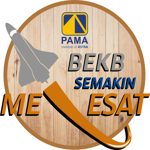

VALCONT PROGRAM
PAMA BEKB
---
Valcont (Validation and Controlling) Program atau yang biasa kita kenal dengan Match Factor merupakan kesesuaian antara unit Loading dengan unit Hauling pada Operasional Penambangan. Tujuannya adalah untuk menentukan Kombinasi alat kerja yang optimal serta memastikan operasional berjalan dengan Produktif dan Aman
Seringkali terjadi bahwa Jumlah unit Hauling yang sudah tersetting, namun dilapangan masih terdapat waktu tunggu pada unit loading ataupun antrian pada unit hauling, sehingga diperlukan untuk terus dicontrol maupun dimonitor secara periodik 2-3 jam, maka dengan adanya Valcont Program diharapkan dapat meminimalkan waktu tunggu ataupun antrian pada Operasional Tambang Site BEKB
Dengan adanya Program ValCont ini juga, diharapkan dapat membantu semua pihak untuk turut serta melakukan Validasi dan Controling secara bersama demi terapainya target produksi
---
Diberikan parameter untuk memonitoring secara periodik di lapangan secara langsung, dengan Sett

In [2]:
#import streamlit as st

import requests
from PIL import Image
from io import BytesIO

# URL gambar di GitHub
image_url = "https://github.com/setyo-dwi-pratama/PROJECTPAMAMF/blob/main/LOGO%20PAMA%20MELESAT.jpg?raw=true"

# Mengunduh gambar
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Mengatur ukuran gambar
new_size = (150, 150)  # Ukuran yang diinginkan
resized_image = image.resize(new_size)

# Menampilkan gambar yang telah diubah ukurannya
resized_image.show()

print("VALCONT PROGRAM")
print("PAMA BEKB")
print("---")
print("Valcont (Validation and Controlling) Program atau yang biasa kita kenal dengan Match Factor merupakan kesesuaian antara unit Loading dengan unit Hauling pada Operasional Penambangan. Tujuannya adalah untuk menentukan Kombinasi alat kerja yang optimal serta memastikan operasional berjalan dengan Produktif dan Aman")
print("Seringkali terjadi bahwa Jumlah unit Hauling yang sudah tersetting, namun dilapangan masih terdapat waktu tunggu pada unit loading ataupun antrian pada unit hauling, sehingga diperlukan untuk terus dicontrol maupun dimonitor secara periodik 2-3 jam, maka dengan adanya Valcont Program diharapkan dapat meminimalkan waktu tunggu ataupun antrian pada Operasional Tambang Site BEKB")
print("Dengan adanya Program ValCont ini juga, diharapkan dapat membantu semua pihak untuk turut serta melakukan Validasi dan Controling secara bersama demi terapainya target produksi")
print("---")

print("Diberikan parameter untuk memonitoring secara periodik di lapangan secara langsung, dengan Settingan unit Loading dapat di sesuaikan dengan EGI sebagai berikut : PC850, PC1250SP8, PC1250SP11R, PC2000SP8, PC200011R")
print("Sedangankan untuk unit Hauling hanya untuk EGI : HD785")
print("---")
print("Masukan Parameter")

# Parameter MF
JumlahHD = float(input("Masukkan Jumlah HD785 (Jumlah): "))
CTPC = float(input("Masukkan Waktu Cycle Time PC (Detik): "))
Passing = float(input("Masukkan Jumlah Passing PC (Jumlah): "))
CTHD = float(input("Masukkan Cycle Time HD (Dari keluar front sampai memasuki front kembali)(Menit): "))
Jarak = float(input("Masukkan Jarak Front ke Disposal (KM): "))

# Validasi jarak tidak boleh nol
if Jarak <= 0:
  print("Jarak tidak boleh nol!")
  Jarak = float(input("Masukkan Jarak Front ke Disposal (KM): "))

# Konversi Parameter
LoadingTime = (CTPC * Passing) / 60

# Formula MF
hasil = (JumlahHD * LoadingTime) / (CTHD)

print(f"Hasil Match Factor adalah {hasil:.2f}")

# Memeriksa Hasil MF
if 0.95 <= hasil <= 1:
    print("MF Good, Pertahankan Parameter! :)")
elif hasil < 0.95:
    # Menentukan jumlah HD yang dibutuhkan untuk mencapai hasil minimum 0.96
    jumlah_hd_rekomendasi = (0.96 * CTHD) / (LoadingTime)
    print(f"Rekomendasi: Tingkatkan Jumlah HD785 menjadi minimal {jumlah_hd_rekomendasi:.2f} HD")
else:
    # Menentukan jumlah HD yang dibutuhkan untuk mencapai hasil maksimum 1
    jumlah_hd2_rekomendasi = (1.00 * CTHD) / (LoadingTime)
    print(f"Rekomendasi: Kurangi Jumlah HD785 menjadi maksimal {jumlah_hd2_rekomendasi:.2f} HD")

#Maximal Productivity Excavator
HD785 = 42
PdtyJam = 60
RitPC = round((PdtyJam/LoadingTime),0)
MaxRitasiPC = RitPC*HD785
print(f"Productivity Maksimal Excavator berdasarkan Parameter diperoleh {MaxRitasiPC:.2f} Bcm/Jam")

#Maximal Productivity HD
MaxRitasiHD = MaxRitasiPC/JumlahHD
print(f"Productivity Maksimal HD785 berdasarkan Parameter diperoleh {MaxRitasiHD:.2f} Bcm/Jam")

#Mencari Speed Rata-Rata dari Parameter
Cthd1 = CTHD - 3
CTHDJAM = Cthd1/60
speed = (Jarak+Jarak)/(CTHDJAM)
print(f"Speed rata-rata berdasarkan Parameter diperoleh {speed:.2f} Km/Jam")
